In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom imports
from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.data.valuations_dfs import TeamValues
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.valuations_visual import TeamValsPlots

pd.set_option('display.max_columns', None)

In [2]:
# read in bundesliga team data
df = gcp.read_df_from_bucket(bucket_name='transfermarkt_db', blob_name='bundesliga_team_data.csv')

[02/27/24 17:55:56] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=358016;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=317664;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=735617;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=375807;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season
0,27,Bayern Munich,fc-bayern-munchen,38,24.7,19,21.36,811.85,2017
1,16,Borussia Dortmund,borussia-dortmund,35,25.0,19,16.41,574.20,2017
2,23826,RB Leipzig,rasenballsport-leipzig,28,24.1,19,13.33,373.30,2017
3,15,Bayer 04 Leverkusen,bayer-04-leverkusen,27,25.3,14,13.24,357.35,2017
4,33,FC Schalke 04,fc-schalke-04,29,25.5,18,9.46,274.35,2017


In [4]:
df.shape

(126, 9)

In [5]:
TeamValues(df).pipeline()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,27,Bayern Munich,fc-bayern-munchen,38,24.7,19,21.36,811.85,2017,Bayern Munich - 2017,50.00
1,16,Borussia Dortmund,borussia-dortmund,35,25.0,19,16.41,574.20,2017,Borussia Dortmund - 2017,54.29
2,23826,RB Leipzig,rasenballsport-leipzig,28,24.1,19,13.33,373.30,2017,RB Leipzig - 2017,67.86
3,15,Bayer 04 Leverkusen,bayer-04-leverkusen,27,25.3,14,13.24,357.35,2017,Bayer 04 Leverkusen - 2017,51.85
4,33,FC Schalke 04,fc-schalke-04,29,25.5,18,9.46,274.35,2017,FC Schalke 04 - 2017,62.07
...,...,...,...,...,...,...,...,...,...,...,...
121,3,1.FC Köln,1-fc-koln,30,25.2,7,3.16,94.70,2023,1.FC Köln - 2023,23.33
122,86,SV Werder Bremen,sv-werder-bremen,26,26.0,12,3.40,88.33,2023,SV Werder Bremen - 2023,46.15
123,80,VfL Bochum,vfl-bochum,30,27.3,14,1.92,57.60,2023,VfL Bochum - 2023,46.67
124,2036,1.FC Heidenheim 1846,1-fc-heidenheim-1846,28,25.8,6,1.76,49.25,2023,1.FC Heidenheim 1846 - 2023,21.43


In [6]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
team_id,int64,0,0.0,27,3.000,23826.00,44.00,1415.31,5461.12,15,11.90
squad_size,int64,0,0.0,22,25.000,47.00,34.00,34.18,4.35,1,0.79
squad_avg_age,float64,0,0.0,37,22.600,27.70,25.00,25.11,0.87,4,3.17
squad_foreigners,int64,0,0.0,23,6.000,28.00,18.50,17.98,4.42,0,0.00
average_value_euro_mill,float64,0,0.0,122,0.903,37.28,5.23,7.41,6.34,13,10.32
total_value_euro_mill,float64,0,0.0,126,28.900,948.95,176.52,250.18,208.73,12,9.52
season,int64,0,0.0,7,2017.000,2023.00,2020.00,2020.00,2.01,0,0.00
foreigner_pct,float64,0,0.0,82,21.430,77.78,52.56,52.44,10.74,3,2.38


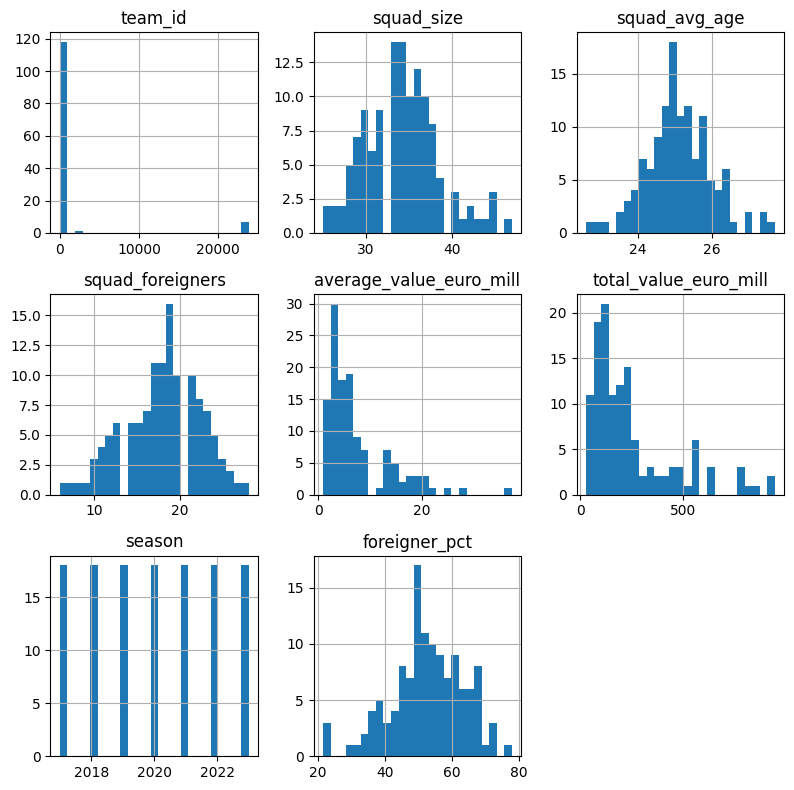

In [7]:
df.hist(bins=25, figsize=(8, 8))
plt.tight_layout()
plt.show()

Statistical plots

In [8]:
stat_plots = StatisticPlots(df)

In [9]:
cols = df.select_dtypes(include='number').columns[1:]

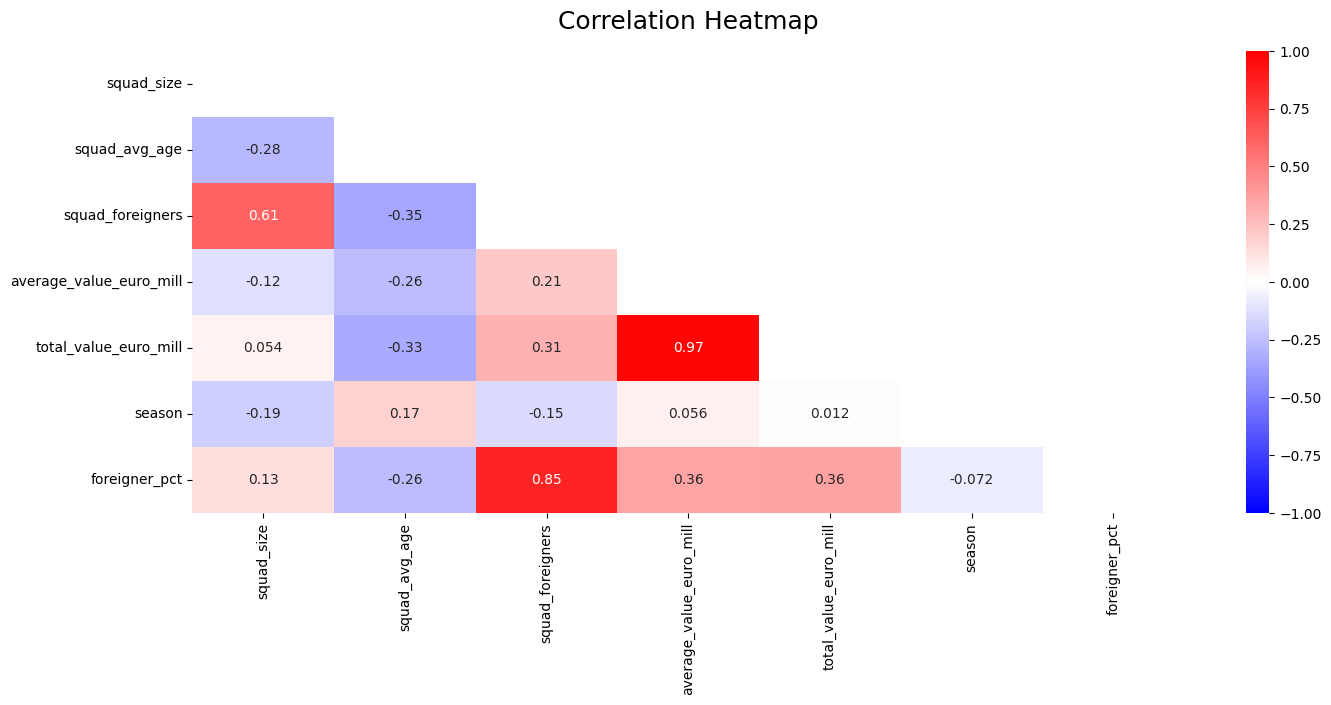

In [10]:
stat_plots.correlation_matrix(vars=cols)

Relationship between total squad value and other vars

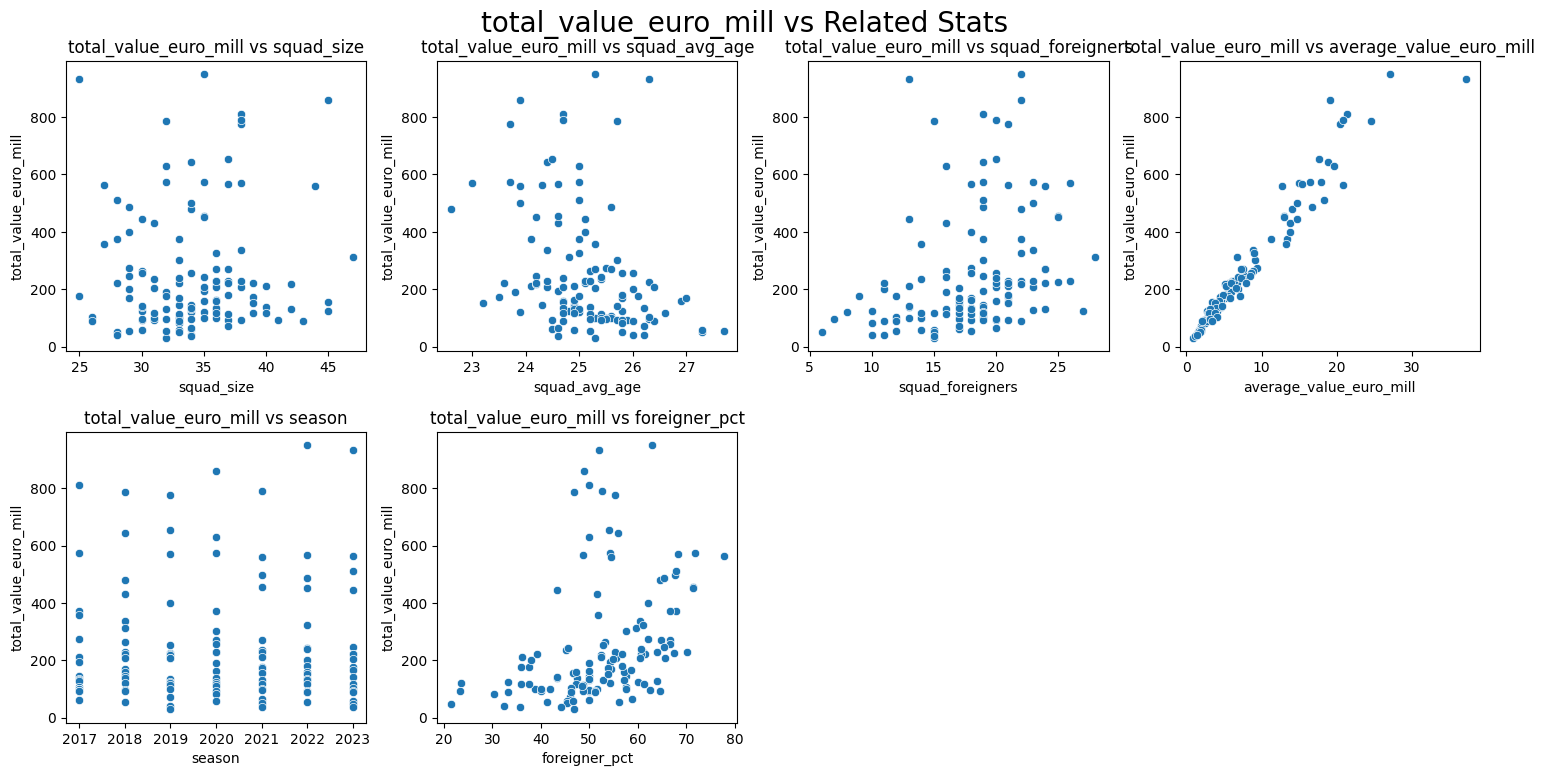

In [11]:
stat_plots.relationships(y='total_value_euro_mill', X=cols)

Relationship between season and each variable

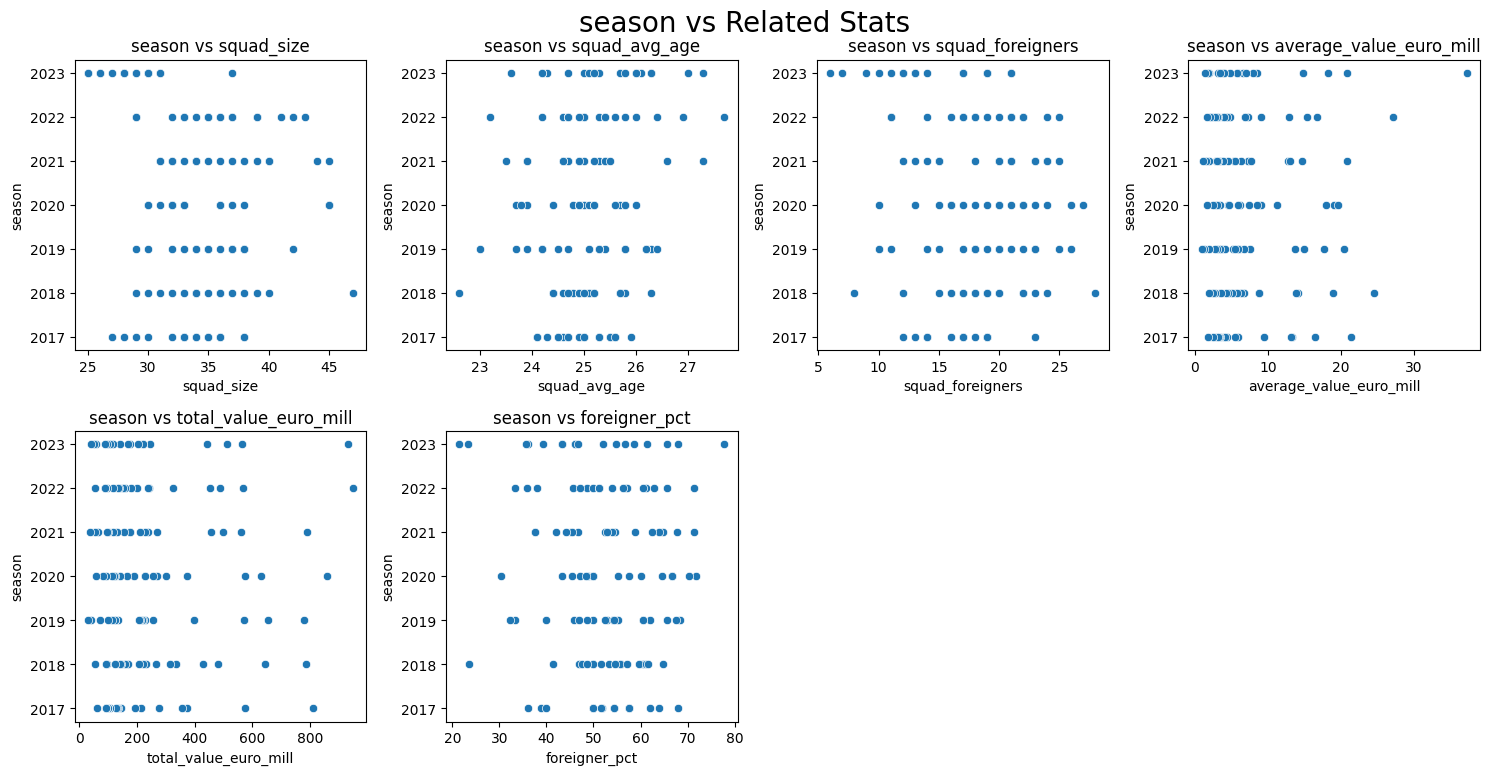

In [12]:
stat_plots.relationships(y='season', X=cols)

In [13]:
plots = TeamValsPlots(df)

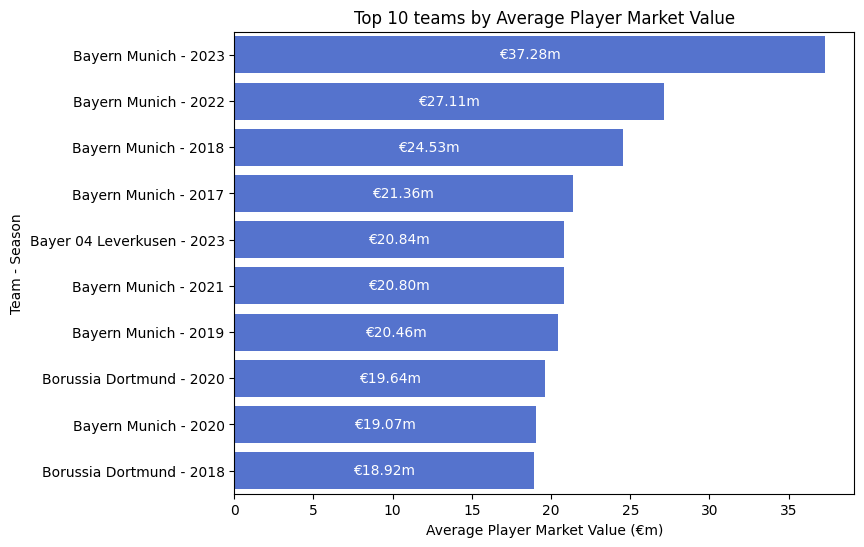

In [14]:
plots.top_10_plot('average_value_euro_mill')
plt.xlabel("Average Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Average Player Market Value")
plt.show()

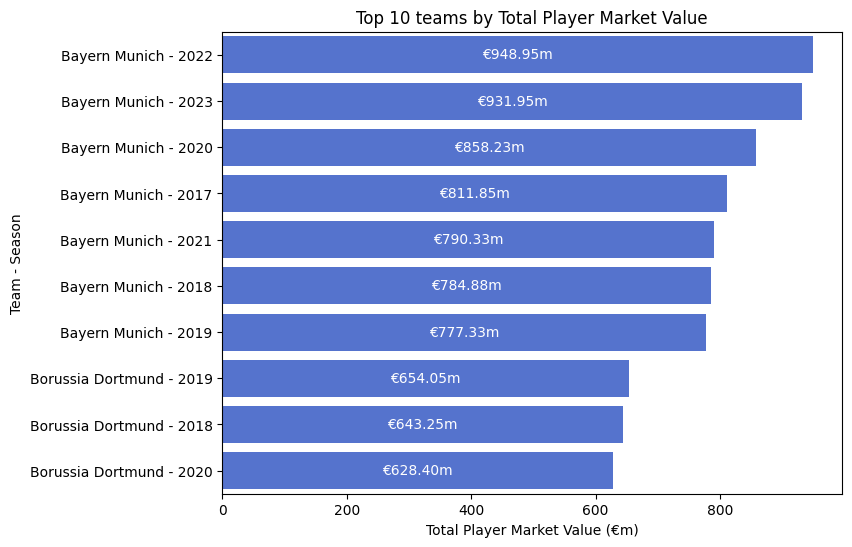

In [15]:
plots.top_10_plot('total_value_euro_mill')
plt.xlabel("Total Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Total Player Market Value")
plt.show()

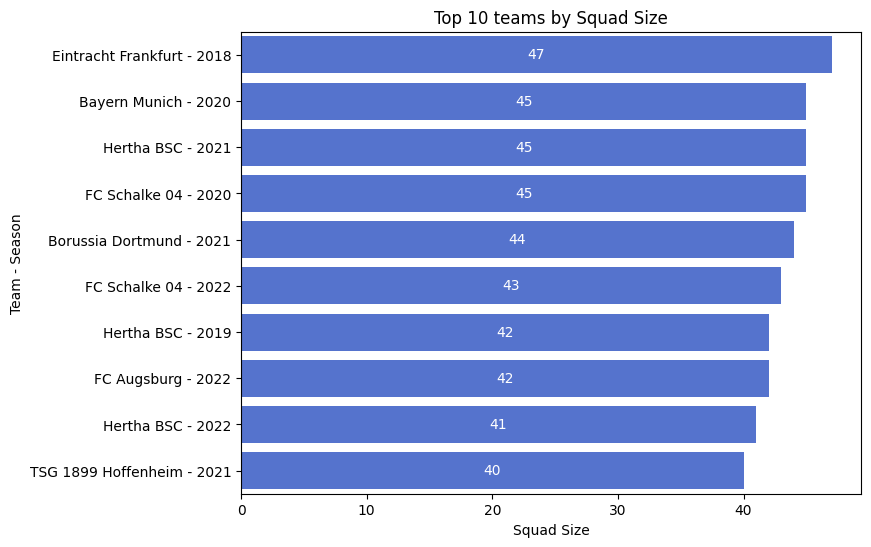

In [16]:
plots.top_10_plot("squad_size")
plt.xlabel("Squad Size")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Squad Size")
plt.show()

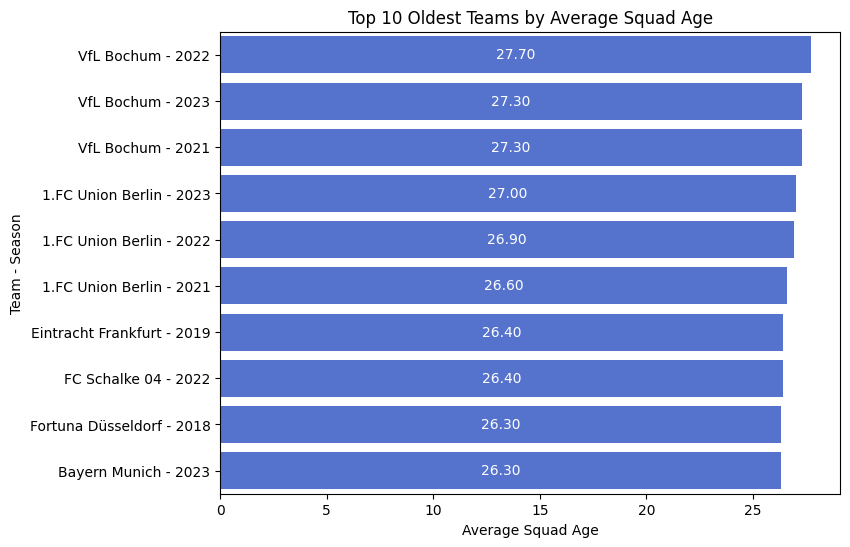

In [17]:
plots.top_10_plot("squad_avg_age")
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Oldest Teams by Average Squad Age")
plt.show()

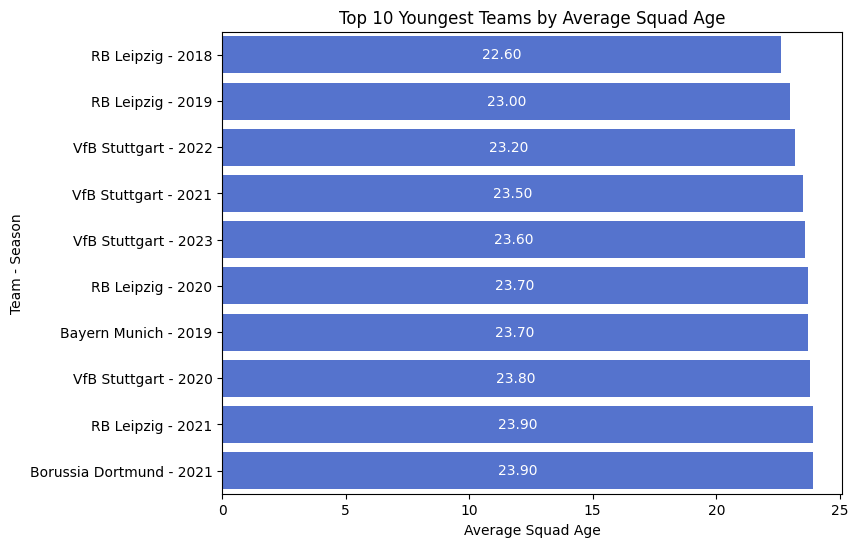

In [18]:
plots.top_10_plot("squad_avg_age", ascend=True)
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Youngest Teams by Average Squad Age")
plt.show()

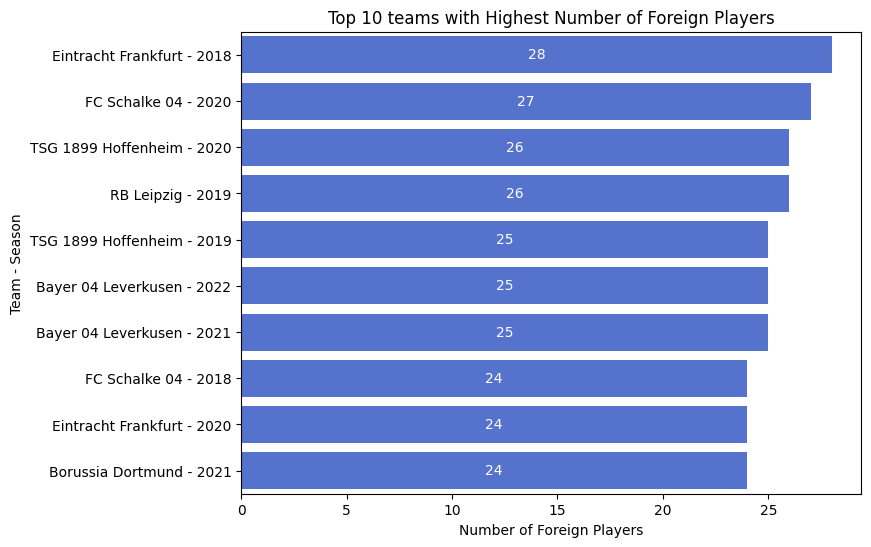

In [19]:
plots.top_10_plot("squad_foreigners")
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Number of Foreign Players")
plt.show()

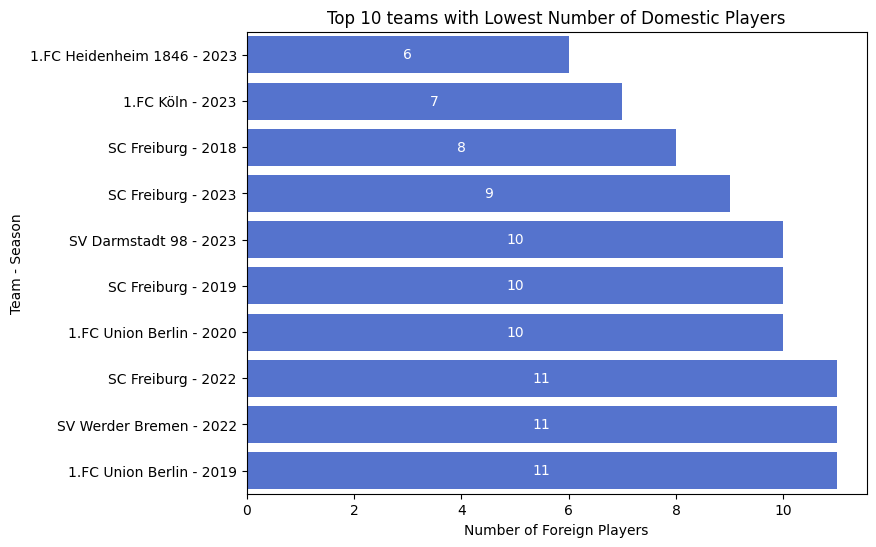

In [20]:
plots.top_10_plot("squad_foreigners", ascend=True)
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Number of Foreign Players")
plt.show()

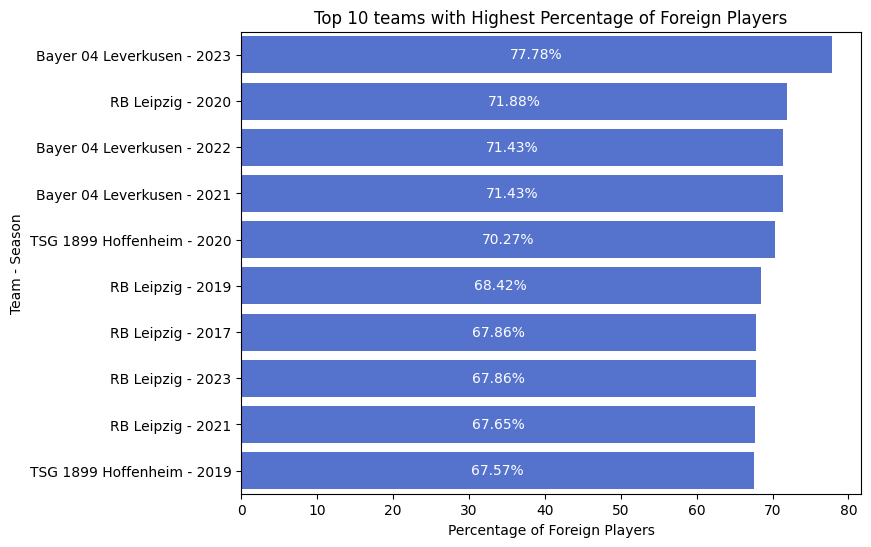

In [21]:
plots.top_10_plot("foreigner_pct")
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Percentage of Foreign Players")
plt.show()

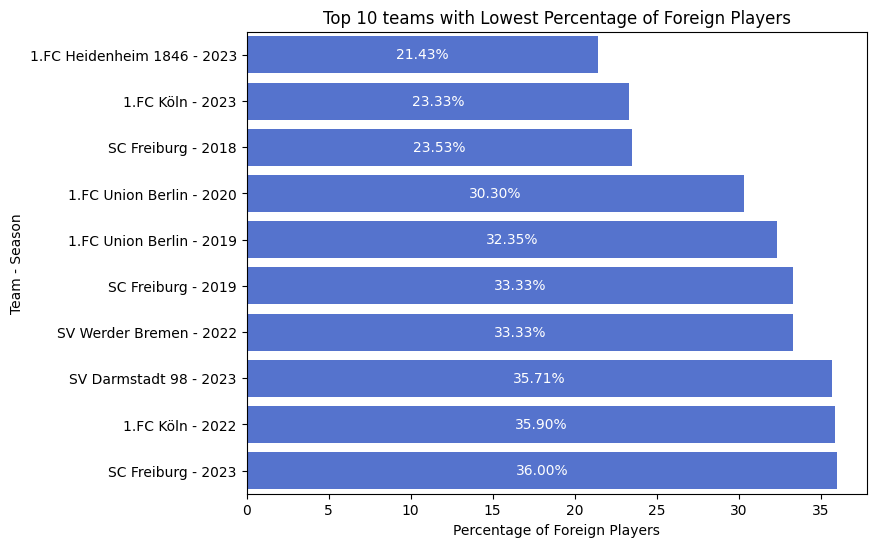

In [22]:
plots.top_10_plot("foreigner_pct", ascend=True)
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Percentage of Foreign Players")
plt.show()

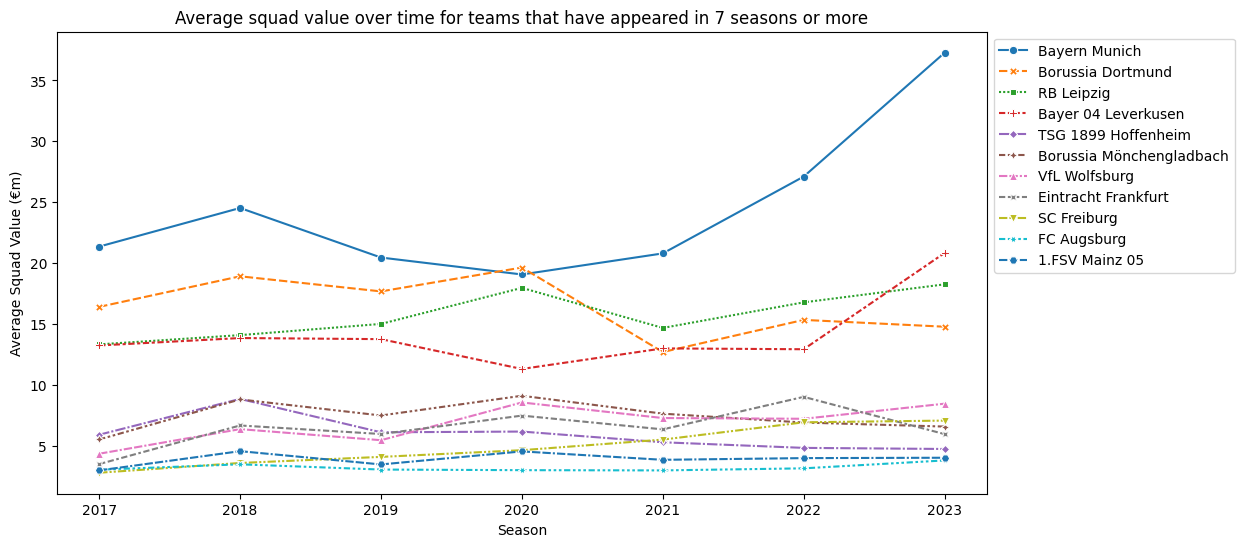

In [23]:
plots.time_series_plot(column='average_value_euro_mill', seasons=7)
plt.show()

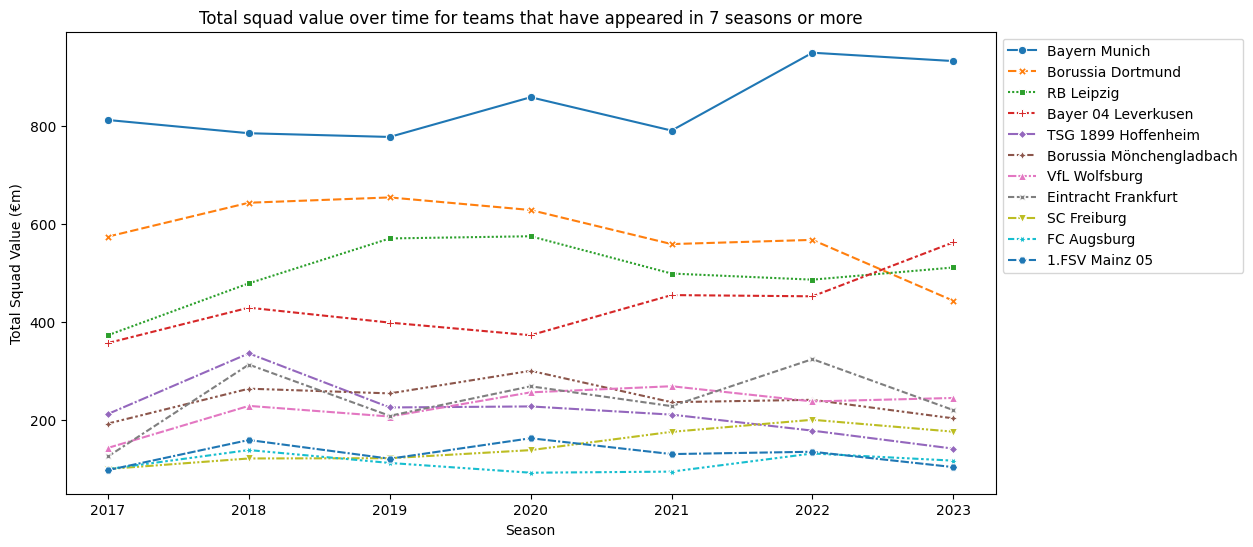

In [24]:
plots.time_series_plot(column='total_value_euro_mill', seasons=7)
plt.show()

## League Analysis

- trends over time for mean, max, min, median
- do this for each of the values

In [25]:
data = df.groupby(['season'])['total_value_euro_mill'].mean().reset_index()

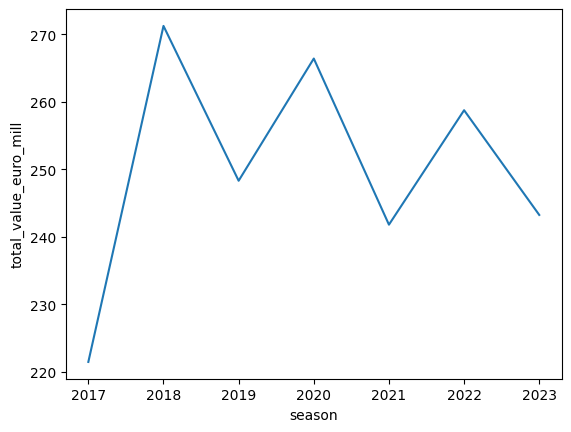

In [26]:
sns.lineplot(data=data, x='season', y='total_value_euro_mill')
plt.show()